<h2 style='color:blue' align='center'>Naive Bayes in ML Tutorial: Predicting survival from titanic crash</h2>

My Video: https://www.youtube.com/watch?v=J-HV7gNVdd0&list=PL3h5bgzzdh0GjYC90FdUFMRcf5Bir05Jl

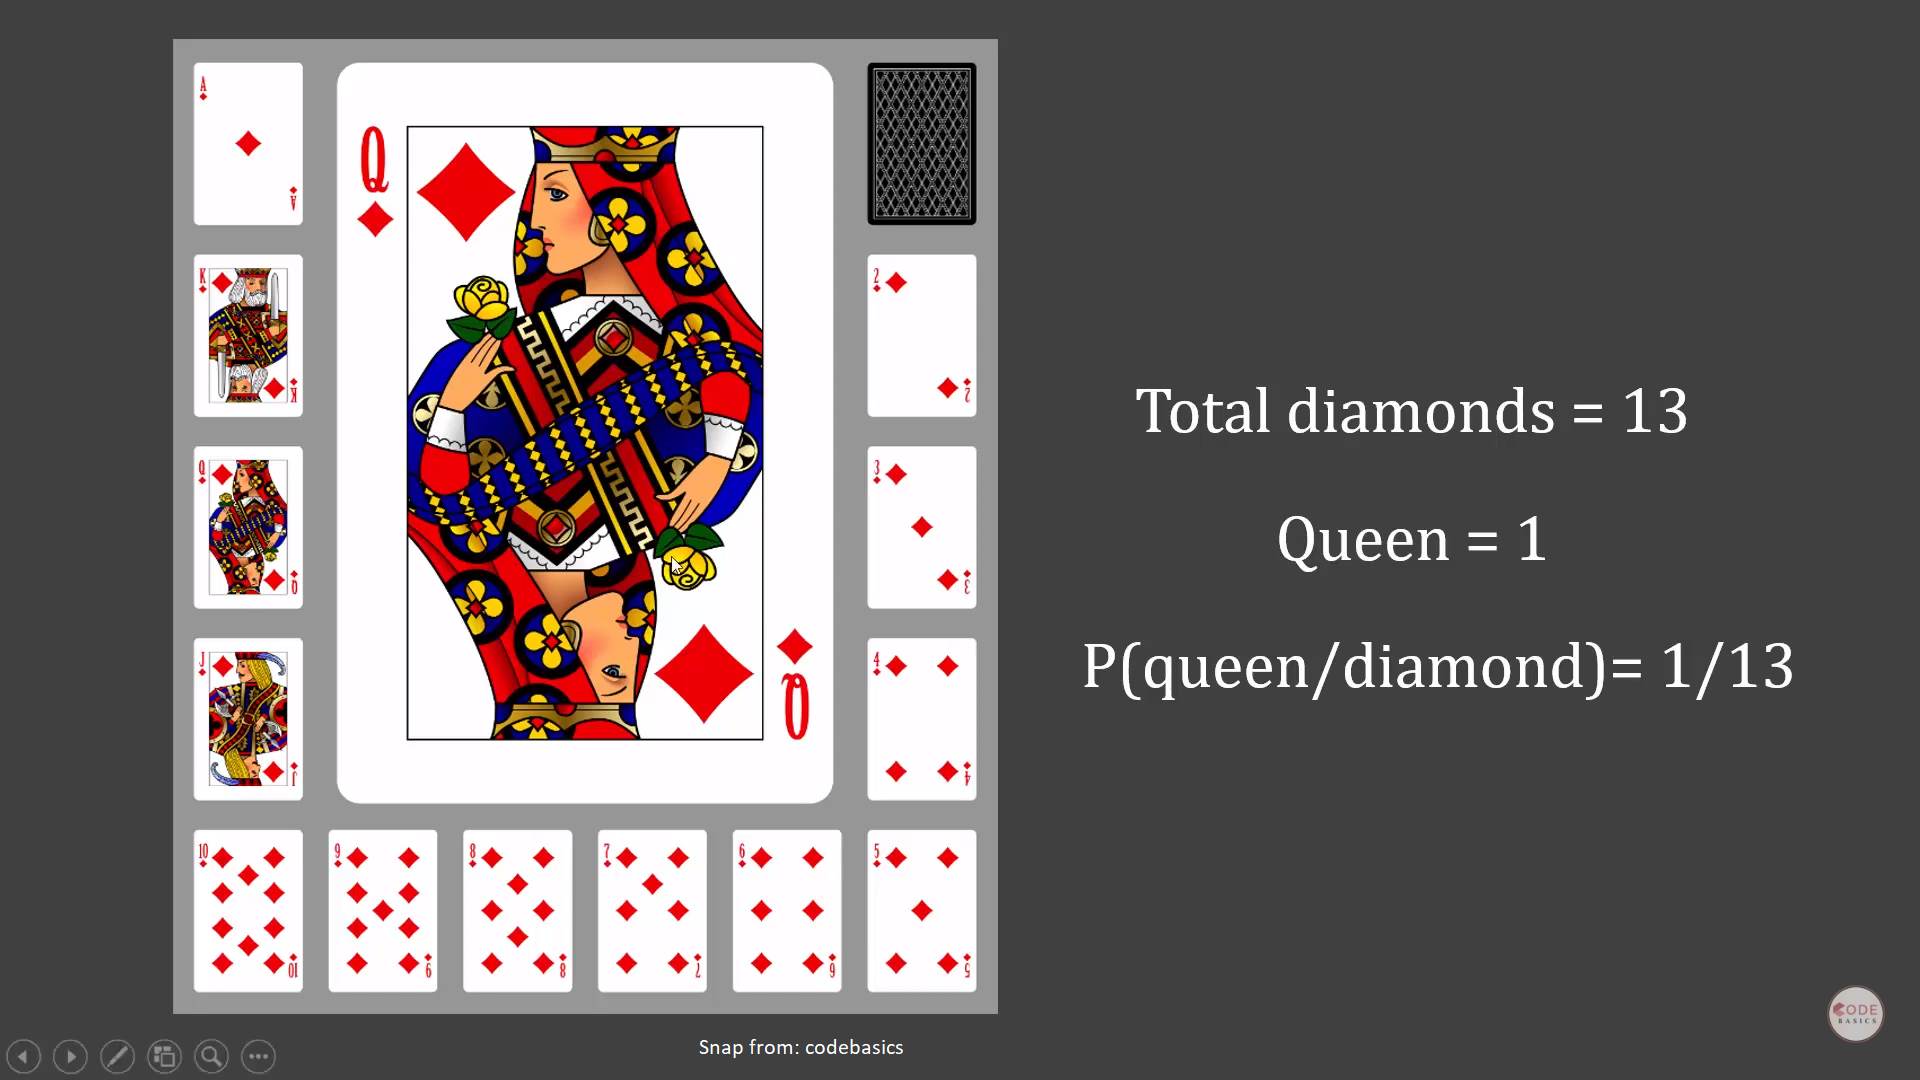

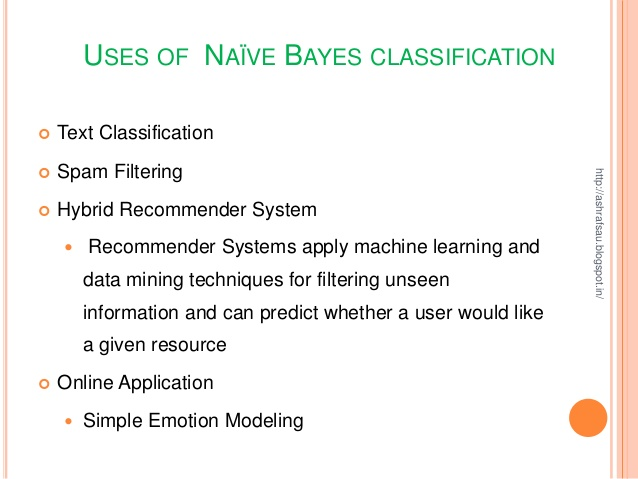

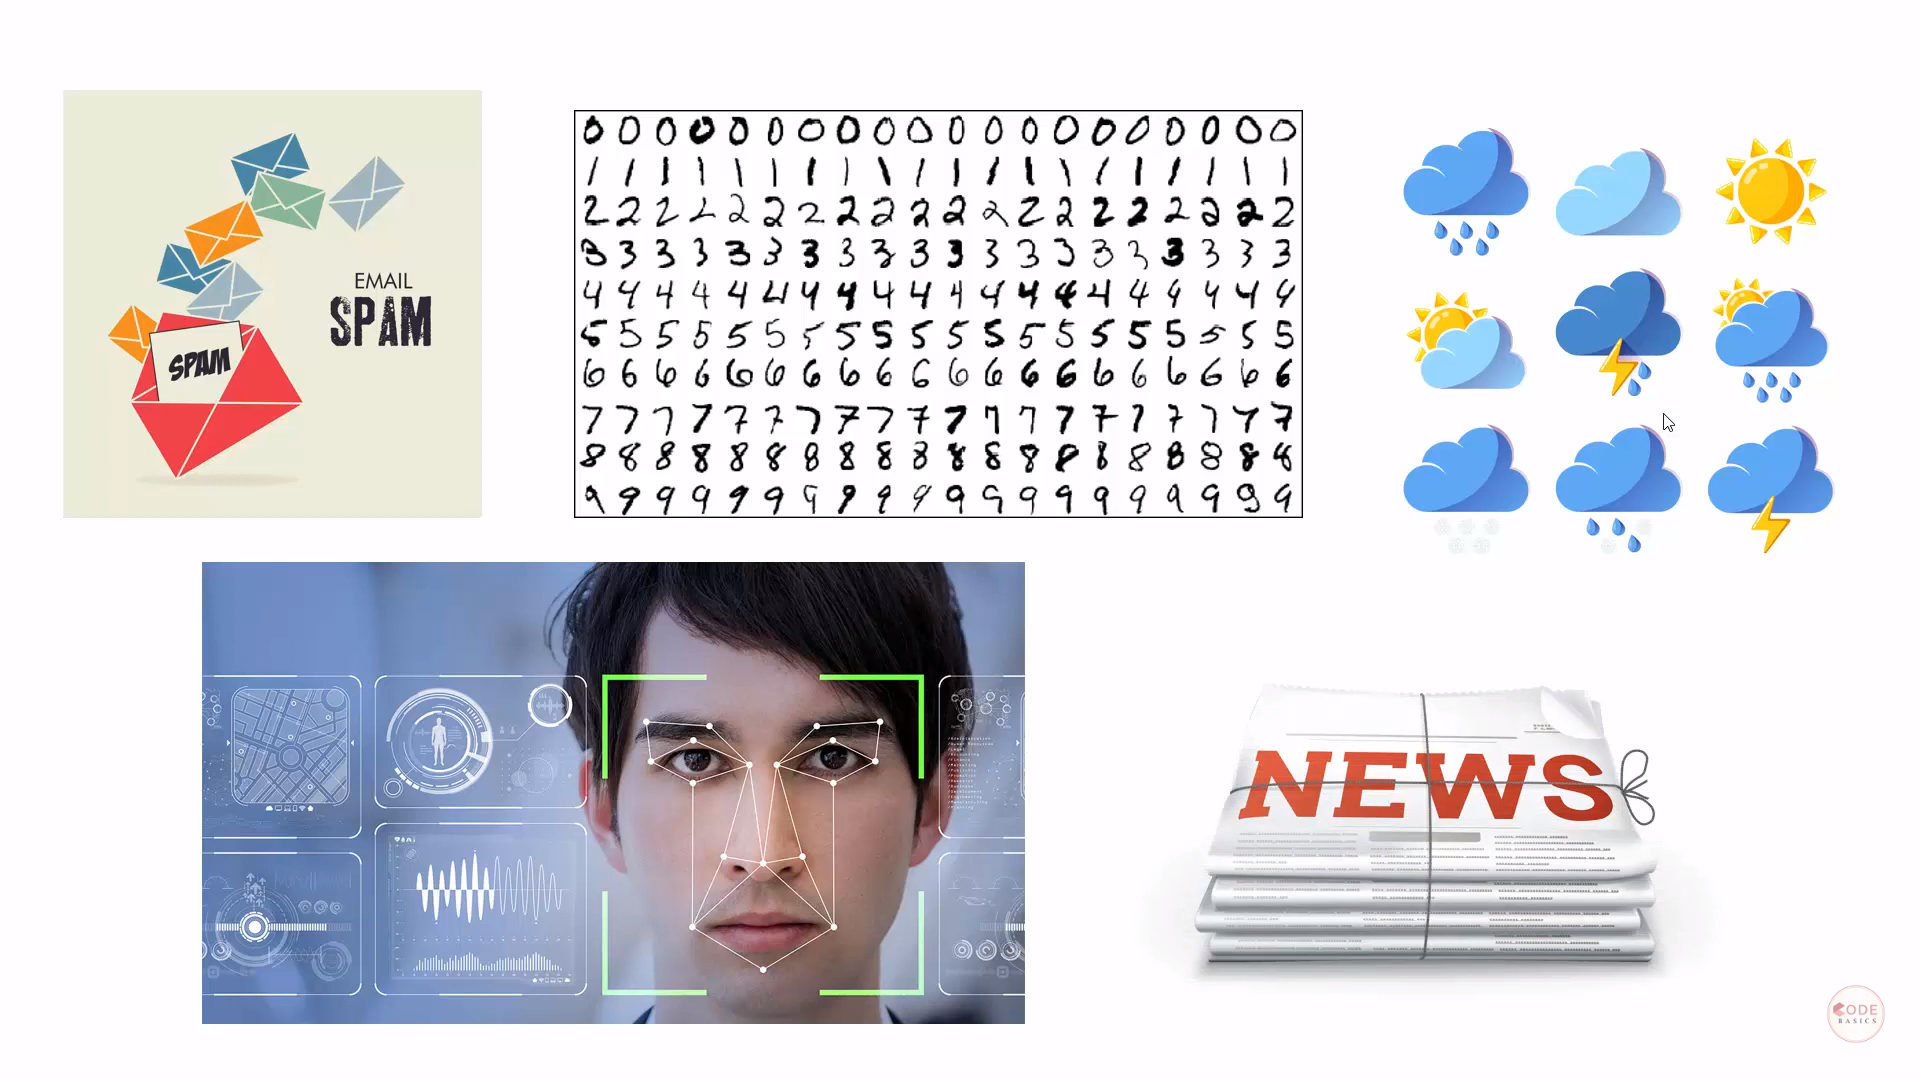

#### Dataset: https://www.kaggle.com/c/titanic

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


## Assumption:
**Make a navie  assumption that features such as male, class, age, cabin, age, cabin, fare, etc are independent of each other**

In [40]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [41]:
# 1-Survived 0-not Survived
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [42]:
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [44]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [45]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


**I am dropping male column as well because of dummy variable trap theory. One column is enough to repressent male vs female<br>
Therefore, by dropping, Male-0 and Female-1**

In [46]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [48]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [49]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [51]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(6)

,Pclass,Age,Fare,female
0,3,22.000000,7.2500,0
1,1,38.000000,71.2833,1
2,3,26.000000,7.9250,1
3,1,35.000000,53.1000,1
4,3,35.000000,8.0500,0
5,3,29.699118,8.4583,0


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [61]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [62]:
model.fit(X_train,y_train)

GaussianNB()

In [63]:
model.score(X_test,y_test)

0.7821229050279329

In [64]:
X_test[0:10]

,Pclass,Age,Fare,female
248,1,37.0,52.5542,0
195,1,58.0,146.5208,1
882,3,22.0,10.5167,1
787,3,8.0,29.1250,0
687,3,19.0,10.1708,0
440,2,45.0,26.2500,1
113,3,20.0,9.8250,1
212,3,22.0,7.2500,0
626,2,57.0,12.3500,0
122,2,32.5,30.0708,0


In [65]:
y_test[0:10]

248    1
195    1
882    0
787    0
687    0
440    1
113    0
212    0
626    0
122    0
Name: Survived, dtype: int64

In [66]:
model.predict(X_test[0:10])

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [67]:
model.predict_proba(X_test[:10])

array([[6.44501313e-01, 3.55498687e-01],
       [9.29049439e-05, 9.99907095e-01],
       [3.83892692e-01, 6.16107308e-01],
       [9.34900297e-01, 6.50997028e-02],
       [9.56371807e-01, 4.36281933e-02],
       [2.32593922e-01, 7.67406078e-01],
       [3.72919050e-01, 6.27080950e-01],
       [9.58645710e-01, 4.13542896e-02],
       [9.08559715e-01, 9.14402854e-02],
       [9.16921342e-01, 8.30786579e-02]])

In [69]:
# pclass, Age, Fare, Gender
test = [[1,23.000000,13.2750,0]]
# test = X_test
a = model.predict(test)
if a[0] ==0:
    print("Not Survived")
else:
    print("Survived")
# print(X_test)

Not Survived


**Calculate the score using cross validation**

In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.77622378, 0.75524476, 0.73943662, 0.80985915, 0.79577465])